# Numerical Methods : Optimization problems

In this notebook we want to introduce the descent methods for optimization problems. These iterative methods are useful to find minima of a function $f(x)$. We suppose that $f$ $\in$ $C^{2}$ and it is inferiorly limited. They go as follows :
At the generic step k, the $x^{(k)}$ is determinated by the point at the previous step $x^{(k-1)}$,by a vector $d^{(k-1)}$ that is function of gradient $\nabla f(x^{(k-1)})$ and a paramater $\alpha$ $\in$ $R$.
After initialization with a point $x^{(0)}$  for k = 0,1... until convergence we can summarize:
\begin{equation}
to \: choose \: \alpha \:\ in \: R \\
to \: calculate\:d^{(k-1)}\:\in \: R^{n}\\
to \: calculate \: x^{(k)} = x^{(k-1)} +\alpha*d^{(k-1)}\\
\end{equation}

The $d^{(k)}$ has the following proprierties:

\begin{equation}
d^{(k)^{T}}\cdot\nabla f(x^{k}) < 0   \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: if \:\:\: \nabla f(x^{(k)})\neq0\\
d^{(k)} = 0 \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: if \:\:\: \nabla f(x^{(k)})=0
\end{equation}

$d^{(k)}$ is a $descent$ $direction$ : $d^{(k)^{T}}$ $\cdot$ $\nabla f(x^{(k)})$ is the directional derivative of $f$ along $d^{(k)}$,asking to be negative, it means to move opposite the gradient $\nabla f(x^{(k)})$, so towards a minum of $f$.

NB: The gradient of a function describes the direction of maximum variation of a function in a vectorial space.


In this notebook we are going to study the gradient descent method: $d$ = - $\nabla f(x)$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Gradient descent in $R$

In [1]:
def quadratic(x):
    return x**2

def derivative(x):
    return 2*x


In [2]:
a = [x for x in range(-100,100)]
b = [quadratic(el) for el in a]


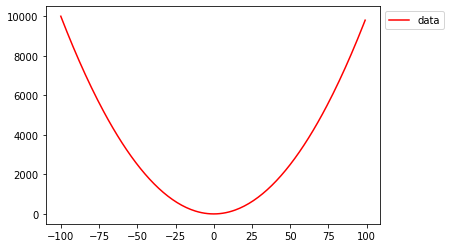

In [5]:
plt.plot(a,b,color = 'red',label = "data")
plt.legend()
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1)

In [6]:
iterations = 400
i = 0
learning_rate = 0.01
x = 10 
def batch_gradient_descent(x,iterations,gradient,learning_rate):
    for i in range(iterations):
        x = x - learning_rate*gradient(x) # where gradient in R it's only a real variable derivative .
    return x    

In [7]:
batch_gradient_descent(x,iterations,derivative,learning_rate)

0.003093358658057131

In [8]:
quadratic(batch_gradient_descent(x,iterations,derivative,learning_rate))

9.568867787377014e-06

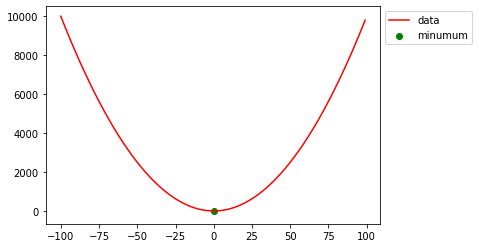

In [9]:
plt.plot(a,b,color = 'red',label = "data")
plt.scatter(batch_gradient_descent(x,iterations,derivative,learning_rate),quadratic(batch_gradient_descent(x,iterations,derivative,learning_rate)),color="green",label="minumum")
plt.legend()
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1)

## Gradient descent in $R^{2}$

In [10]:
def quadratic_2(x,y):
    return x**2 + y**2
def derivative_x(x):
    return 2*x
def derivative_y(y):
    return 2*y
def gradf(x,y):
    return np.array([derivative_x(x),derivative_y(y)]) 

In [11]:
def batch_gradient_descent_2(x,iterations,gradient,learning_rate):
    for i in range(iterations):
        x = x - learning_rate*gradient(x[0],x[1]) # Here we have to pass gradf(x,y) because we are in R^2 not simply in R, this is a real "gradient".
    return x    

In [14]:
init_point = np.array([10,10])
batch_gradient_descent_2(init_point,iterations,gradf,learning_rate)

array([0.00309336, 0.00309336])

In [15]:
x = [x for x in range(-100,100)]
y = [y for y in range(-100,100)]
z = []

X, Y = np.meshgrid(x, y)
Z = quadratic_2(X,Y)


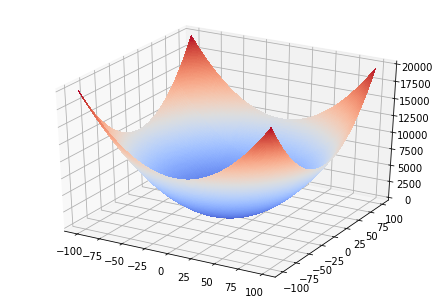

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)


Let's plot level curves.

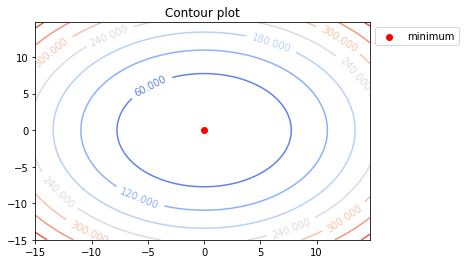

In [17]:

x_1 = np.arange(-15, 15, 0.25)
y_1 = np.arange(-15, 15, 0.25)
X_1, Y_1 = np.meshgrid(x_1, y_1)

Z_1 = quadratic_2(X_1,Y_1)
plt.scatter(batch_gradient_descent_2(init_point,iterations,gradf,learning_rate)[0],batch_gradient_descent_2(init_point,iterations,gradf,learning_rate)[1],color ="red", label = "minimum")
CS = plt.contour(X_1, Y_1, Z_1, cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour plot')
plt.legend()
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1)

## Gradient Descent con Funzione di costo $L^2$


Let's simulate some gaussian data.

In [19]:
X_1 = 2 * np.random.rand(100,1)
Y_1 = 4 +3 * X_1+np.random.randn(100,1)


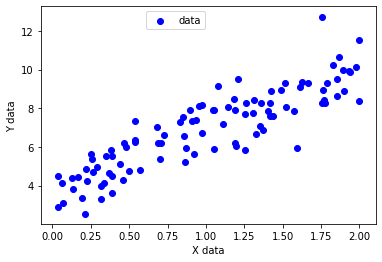

In [20]:
plt.scatter(X_1,Y_1,color = "blue",label = "data")
plt.xlabel("X data")
plt.ylabel("Y data")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

In [21]:
def cost_fun(X,Y,theta):
    m = X.shape[0]
    pred = X.dot(theta)
    cost = (1/2*m)*np.sum((pred-Y)**2)
    return cost

def gradient_descent(X_d,y,theta,iterations,learning_rate):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2)) # the form of the fit is y = theta_1*x_1 + theta_0, a simple linear fit
    for i in range(iterations):
        prediction = np.dot(X_d,theta)
        theta = theta - learning_rate*(1/m)*(X_d.T.dot(prediction-y)) # The gradient in a matrix form of the cost function (in the )
        theta_history[i,:] = theta.T
        cost_history[i] = cost_fun(X_d,y,theta)
        
    return theta,theta_history,cost_history
        

In [132]:
theta_init = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X_1),1)),X_1] # adding a column of 1 for matrix operations
m = len(X_b)

In [492]:
X_b.shape

(100, 2)

In [159]:
iterations = 250
learning_rate = 0.01
iter_list = [el for el in range(iterations)]

In [160]:
theta,theta_history,cost_history=gradient_descent(X_b,Y_1,theta_init,iterations,learning_rate)

In [181]:
print("The cost functions and theta vector are : %.2f and [%.2f,%.2f]"  %(cost_history[len(cost_history)-1],theta[0],theta[1]))

The cost functions and theta vector are : 615.06 and [3.01,3.93]


Let's plot the cost function, the angular coefficient and the intercept versus the iterations.

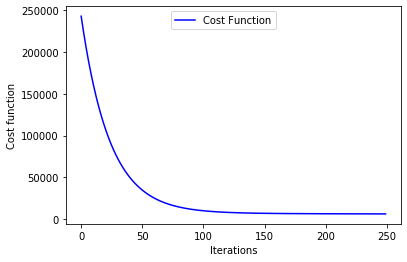

In [162]:
plt.plot(iter_list,cost_history,color = "blue", label ="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

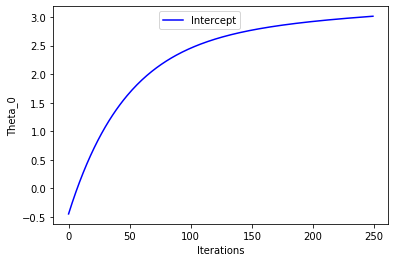

In [171]:
plt.plot(iter_list,theta_history[:,0],color = "blue", label ="Intercept")
plt.xlabel("Iterations")
plt.ylabel("Theta_0")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

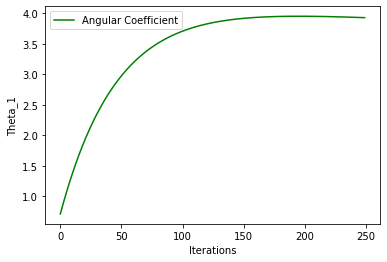

In [172]:
plt.plot(iter_list,theta_history[:,1],color = "green", label ="Angular Coefficient")
plt.xlabel("Iterations")
plt.ylabel("Theta_1")
plt.legend()
plt.legend(bbox_to_anchor=(0,1), loc='upper left', ncol=1)

We can now perform a linear fit  : $Y = X\Theta$, where : dim[X] = nxm,  dim[$\Theta$] = mx1  

In [203]:
Y_fit = theta[0] + X_1*theta[1] 

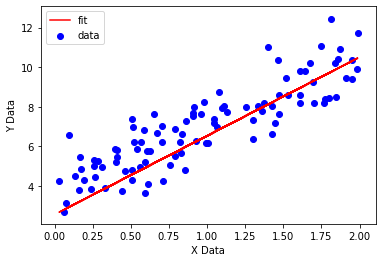

In [204]:
plt.plot(X_1,Y_fit,color="red",label = "fit")
plt.scatter(X_1,Y_1,color ="blue",label = "data")
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.legend()
plt.legend(bbox_to_anchor=(0,1), loc='upper left', ncol=1)

## Mini Batch Gradient Descent con funzione di costo $L^2$

In [173]:
iterations = 250
learning_rate = 0.01
iter_list = [el for el in range(iterations)]
size_batch = 10

In [125]:
m = len(X_b)
def mini_batch_gradient_descent(X_d,y,theta,iterations,learning_rate,size_batch):
    m = len(X_d)
    num_batch = int(m/size_batch)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for i in range(iterations):
        cost = 0
        indices = np.random.permutation(m)
        X_d = X_d[indices]
        y = y[indices]
        for j in range(0,m,size_batch):
            X_d_j =X_d[j:j+size_batch] 
            y_j =y[j:j+size_batch] 
            
            prediction = X_d_j.dot(theta)
            theta = theta - learning_rate*(1/m)*(X_d_j.T.dot(prediction-y_j))
            cost += cost_fun(X_d_j,y_j,theta)
            if(j==(m-size_batch)):
                cost_history[i] = cost
                theta_history[i,:] = theta.T
    
    
    return theta,theta_history,cost_history

In [184]:
theta,theta_history,cost_history=mini_batch_gradient_descent(X_b,Y_1,theta_init,iterations,learning_rate,size_batch)

In [185]:
print("The cost functions and theta vector are : %.2f and [%.2f,%.2f]"  %(cost_history[len(cost_history)-1],theta[0],theta[1]))

The cost functions and theta vector are : 615.03 and [3.01,3.93]


Let's plot the cost function, the angular coefficient and the intercept versus the iterations.

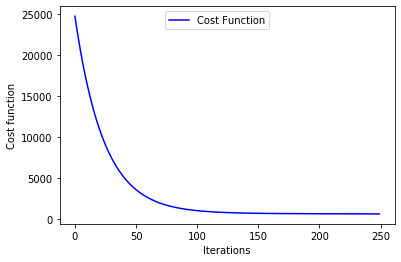

In [186]:
plt.plot(iter_list,cost_history,color = "blue", label ="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

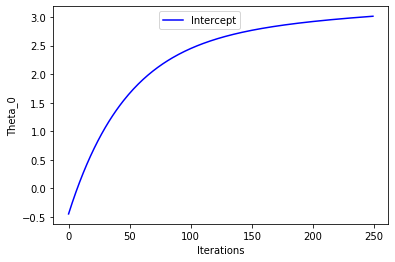

In [187]:
plt.plot(iter_list,theta_history[:,0],color = "blue", label ="Intercept")
plt.xlabel("Iterations")
plt.ylabel("Theta_0")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

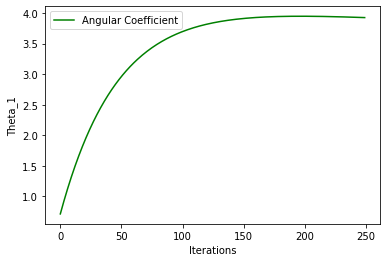

In [188]:
plt.plot(iter_list,theta_history[:,1],color = "green", label ="Angular Coefficient")
plt.xlabel("Iterations")
plt.ylabel("Theta_1")
plt.legend()
plt.legend(bbox_to_anchor=(0,1), loc='upper left', ncol=1)

We can now perform a linear fit  : $Y = X\Theta$, where : dim[X] = nxm,  dim[$\Theta$] = mx1  

In [205]:
Y_fit = theta[0] + X_1*theta[1] 

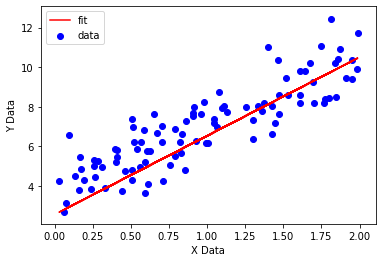

In [206]:
plt.plot(X_1,Y_fit,color="red",label = "fit")
plt.scatter(X_1,Y_1,color ="blue",label = "data")
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.legend()
plt.legend(bbox_to_anchor=(0,1), loc='upper left', ncol=1)

## Stochastic Gradient Descent con funzione di costo  $L^{2}$


In [207]:
iterations = 250
learning_rate = 0.5
iter_list = [el for el in range(iterations)]

In [87]:
def stochastic_gradient_descent(X_d,y,theta,iterations,learning_rate):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m = len(X_b)
    for i in range(iterations):
        rand = np.random.randint(0,m)
        X_d_j = X_d[rand,:].reshape(1,X_d.shape[1]) # In this way i take only one example at time with a row vector (dimensions of an example [X_i]: 1xn).
        y_j = y[rand,:].reshape(1,1) # In this way i take only one example at time with a row vector (dimensions of an example [y_i]: 1x1)
        
        prediction = X_d_j.dot(theta)
        theta = theta - learning_rate*(1/m)*(X_d_j.T*(prediction-y_j))
        
        cost_history[i] = cost_fun(X_d_j,y_j,theta)
        theta_history[i,:] = theta.T
    
    return theta,theta_history,cost_history
        
    

In [208]:
theta,theta_history,cost_history=stochastic_gradient_descent(X_b,Y_1,theta_init,iterations,learning_rate)

In [209]:
print("The cost functions and theta vector are : %.2f and [%.2f,%.2f]"  %(cost_history[len(cost_history)-1],theta[0],theta[1]))

The cost functions and theta vector are : 0.09 and [2.72,3.83]


Let's plot the cost function, the angular coefficient and the intercept versus the iterations.

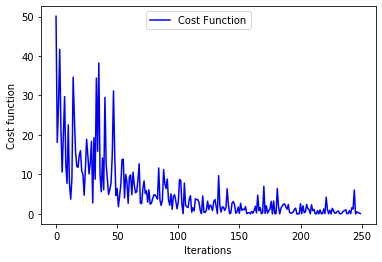

In [210]:
plt.plot(iter_list,cost_history,color = "blue", label ="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

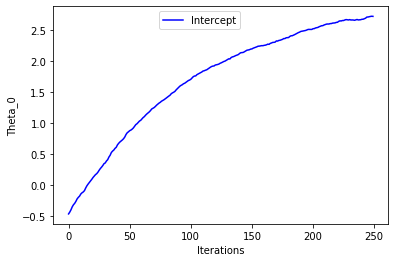

In [213]:
plt.plot(iter_list,theta_history[:,0],color = "blue", label ="Intercept")
plt.xlabel("Iterations")
plt.ylabel("Theta_0")
plt.legend()
plt.legend(bbox_to_anchor=(0.3,1), loc='upper left', ncol=1)

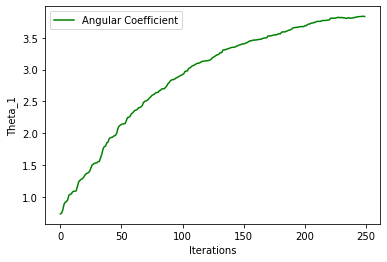

In [212]:
plt.plot(iter_list,theta_history[:,1],color = "green", label ="Angular Coefficient")
plt.xlabel("Iterations")
plt.ylabel("Theta_1")
plt.legend()
plt.legend(bbox_to_anchor=(0,1), loc='upper left', ncol=1)

We can now perform a linear fit  : $Y = X\Theta$, where : dim[X] = nxm,  dim[$\Theta$] = mx1  

In [214]:
Y_fit = theta[0] + X_1*theta[1] 

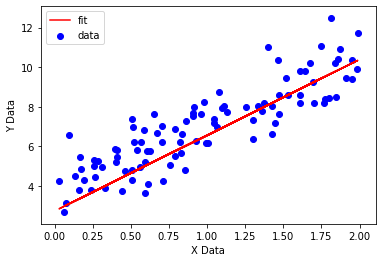

In [215]:
plt.plot(X_1,Y_fit,color="red",label = "fit")
plt.scatter(X_1,Y_1,color ="blue",label = "data")
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.legend()
plt.legend(bbox_to_anchor=(0,1), loc='upper left', ncol=1)

## References:  
<ol>
<li>Calcolo Scientifico: A. Quarteroni, F. Saleri, P. Gervasio</li>
<li>Deep Learning: I. Goodfellow, Y. Bengio, A. Courville</li>
<li>Mathematics for machine learning: M. P. Deisenroth, A. A. Faisal, C. S. Ong</li>
</ol>


